# Week 7 Lecture 2: Hyperparameter tuning

MTU Spring 2025

Instructor: Amna Mazen

## Imports

In [2]:
import os

%matplotlib inline
import string
import sys
from collections import deque

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

sys.path.append("code/.")

#from plotting_functions import *
from sklearn import datasets
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.dummy import DummyClassifier, DummyRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import (
    GridSearchCV,
    RandomizedSearchCV,
    cross_val_score,
    cross_validate,
    train_test_split,
)
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.svm import SVC, SVR
from sklearn.tree import DecisionTreeClassifier
#from utils import *

## Hyperparameter optimization motivation


### Motivation

- Remember that the fundamental goal of supervised machine learning is to generalize beyond what we see in the training examples.
- We have been using data splitting and cross-validation to provide a framework to approximate generalization error.  
- With this framework, we can improve the model's generalization performance by tuning model hyperparameters using cross-validation on the training set.

### Hyperparameters: the problem

- In order to improve the generalization performance, finding the best values for the important hyperparameters of a model is necessary for almost all models and datasets.
- Picking good hyperparameters is important because if we don't do it, we might end up with an underfit or overfit model.

### Some ways to pick hyperparameters:
- Manual or expert knowledge or heuristics based optimization
- Data-driven or automated optimization

#### Manual hyperparameter optimization

- Advantage: we may have some intuition about what might work.
  - E.g. if I'm massively overfitting, try decreasing `max_depth` or `C`.
- Disadvantages
    - it takes a lot of work
    - not reproducible
    - in very complicated cases, our intuition might be worse than a data-driven approach

## Automated hyperparameter optimization

- Formulate the hyperparamter optimization as a one big search problem.
- Often we have many hyperparameters of different types: Categorical, integer, and continuous.
- Often, the search space is quite big and systematic search for optimal values is infeasible.

### Grid Search

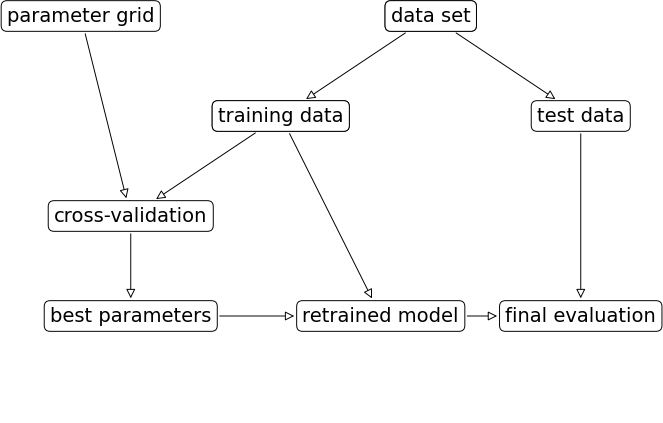

In [ ]:
mglearn.plots.plot_grid_search_overview()

Let's look at an example of tuning `max_depth` of the `DecisionTreeClassifier` on the Spotify dataset.

In [3]:
spotify_df = pd.read_csv("https://raw.githubusercontent.com/MazenMTULab/ML_COURSE_RESOURCES/refs/heads/main/Dataset/Lecture_Dataset/spotify.csv", index_col=0)
X_spotify = spotify_df.drop(columns=["target", "song_title", "artist"])
y_spotify = spotify_df["target"]
X_spotify.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286
1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588
2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173
3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230
4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904


In [4]:
np.unique(y_spotify)

array([0, 1])

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X_spotify, y_spotify, test_size=0.2, random_state=123
)

In [6]:
best_score = 0

param_grid = {"max_depth": np.arange(1, 20, 2)}

results_dict = {"max_depth": [], "mean_cv_score": []}



In [7]:
param_grid

{'max_depth': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19])}

In [8]:
for depth in param_grid["max_depth"]:  # for each combination of parameters, train an decision tree classifier
    dt = DecisionTreeClassifier(max_depth=depth)
    scores = cross_val_score(dt, X_train, y_train)  # perform cross-validation
    mean_score = np.mean(scores)  # compute mean cross-validation accuracy
    if (
        mean_score > best_score
    ):  # if we got a better score, store the score and parameters
        best_score = mean_score
        best_params = {"max_depth": depth}
    results_dict["max_depth"].append(depth)
    results_dict["mean_cv_score"].append(mean_score)

In [9]:
best_params

{'max_depth': 5}

In [10]:
best_score

0.721642982135646